# Greenhouse

### <font color=red> Please use the template below to answer the _complete workshop questions from the course notes_.</font>

## your name: Frank D'Agostino

In [1]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
import matplotlib
import pickle
from matplotlib.ticker import MultipleLocator

# load the data from a pickle file:
with open('./greenhouse_variables.pickle', 'rb') as file:
    d = pickle.load(file)
    # print information about each extracted variable:
    for key in list(d.keys()):
        print("extracting pickled variable: name=", key,"; size=", d[key].shape)
        #print("; type=",type(d[key]))
    globals().update(d)


extracting pickled variable: name= CO2_observed ; size= (91,)
extracting pickled variable: name= CO2_observed_years ; size= (91,)
extracting pickled variable: name= CO2_rcp85 ; size= (101,)
extracting pickled variable: name= CO2_rcp85_years ; size= (101,)
extracting pickled variable: name= OLR_280ppm_CO2_only ; size= (19960,)
extracting pickled variable: name= OLR_560ppm_CO2_only ; size= (19960,)
extracting pickled variable: name= wavenumbers ; size= (19960,)


### Explanation of variables:

<b>CO2_observed</b> is a time series, as function of time in years given by variable <b>CO2_observed_years</b>.

<b>OLR_280ppm_CO2_only</b> is the top-of-the-atmopshere outgoing longwave radiation, with 280 ppm of CO2, as function of <b>wavenumbers</b>, that are given by the variable of that name.

## 1) plot greenhouse time series, past and projected

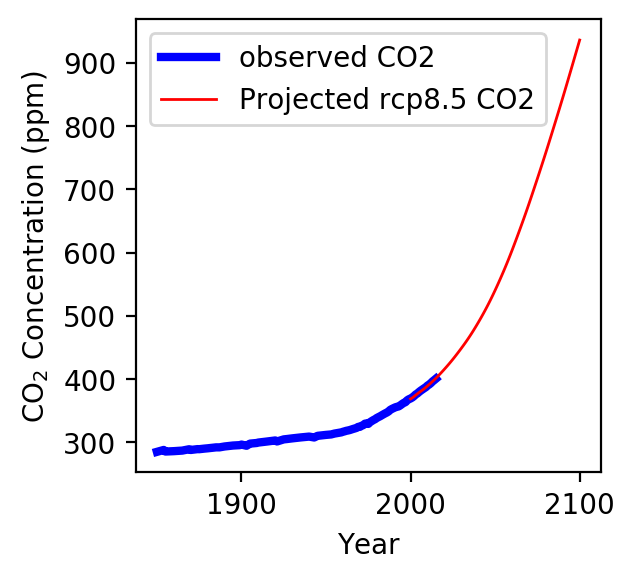

In [5]:
fig = plt.figure(1,figsize=(3,3),dpi=200)
plt.plot(CO2_observed_years,CO2_observed,lw=3,color="blue",label="observed CO2")
plt.plot(CO2_rcp85_years,CO2_rcp85,lw=1,color="red",label="Projected rcp8.5 CO2")
plt.legend()
plt.xlabel("Year")
plt.ylabel('CO$_2$ Concentration (ppm)');

##  2)  2-layer energy balance model

## Solution 
The new energy balance equation for the surface is: 
\begin{equation}\frac{S_0}{4}(1-\Delta)(1-\alpha) +\epsilon \sigma \theta^4 = \sigma T^4\end{equation}
\begin{equation}
\Delta = 0.15, 
\epsilon = 0.8, 
\alpha = 0.25
\end{equation}

The new energy balance equation for the atmosphere is: 
\begin{equation}\Delta\frac{S_0}{4} + \epsilon \sigma T^4 = 2\epsilon \sigma \theta^4 \end{equation}

where $T$ is the surface temperature, and $\theta$ is the atmospheric temperature. Substituting the second equation into the first yields:
\begin{equation} \frac{S_0}{4}(1-\Delta)(1-\alpha) + \frac{\Delta S_0}{8} + \frac{\epsilon \sigma T^4}{2} = \sigma T^4\end{equation}
Solving for $T$ yields:
\begin{equation}T = \left[\frac{\frac{S_0}{4}(1-\Delta)(1-\alpha) + \frac{\Delta S_0}{8}}{\sigma(1-\frac{\epsilon}{2})} \right]^{1/4} \end{equation}

In [7]:
# evaluating the solution numerically:

So = 1388
alb = .25
epsilon = .8
sigma = 5.6696e-8
Delta = .15
T = ((((So/4)*(1-Delta)*(1-alb))+((Delta*So)/8))/(sigma*(1-(epsilon/2))))**(1/4)
print('T = ', T)
theta = (((Delta*(So/4))+(epsilon*sigma*T**4))/(2*epsilon*sigma))**(1/4)
print('theta = ',theta)

T =  291.9797069416196
theta =  254.69032018323819


## 3) Radiative forcing

## Solutions
a) The top of the trapezoid represents the amount of long wave radiation exiting the atmosphere, while the bottom of the trapezoid represents the amount of long wave radiation exiting the atmosphere after passing through CO2. As a result, the difference between the top and bottom of the trapezoid represents the amount of long wave radiation being absorbed by CO2. Therefore, the level of last absorption determines the amount of energy that CO2 can absorb or not interact with, meaning that higher or lower wavelengths outside the width of the trapezoid can surpass the level of last absorption. 

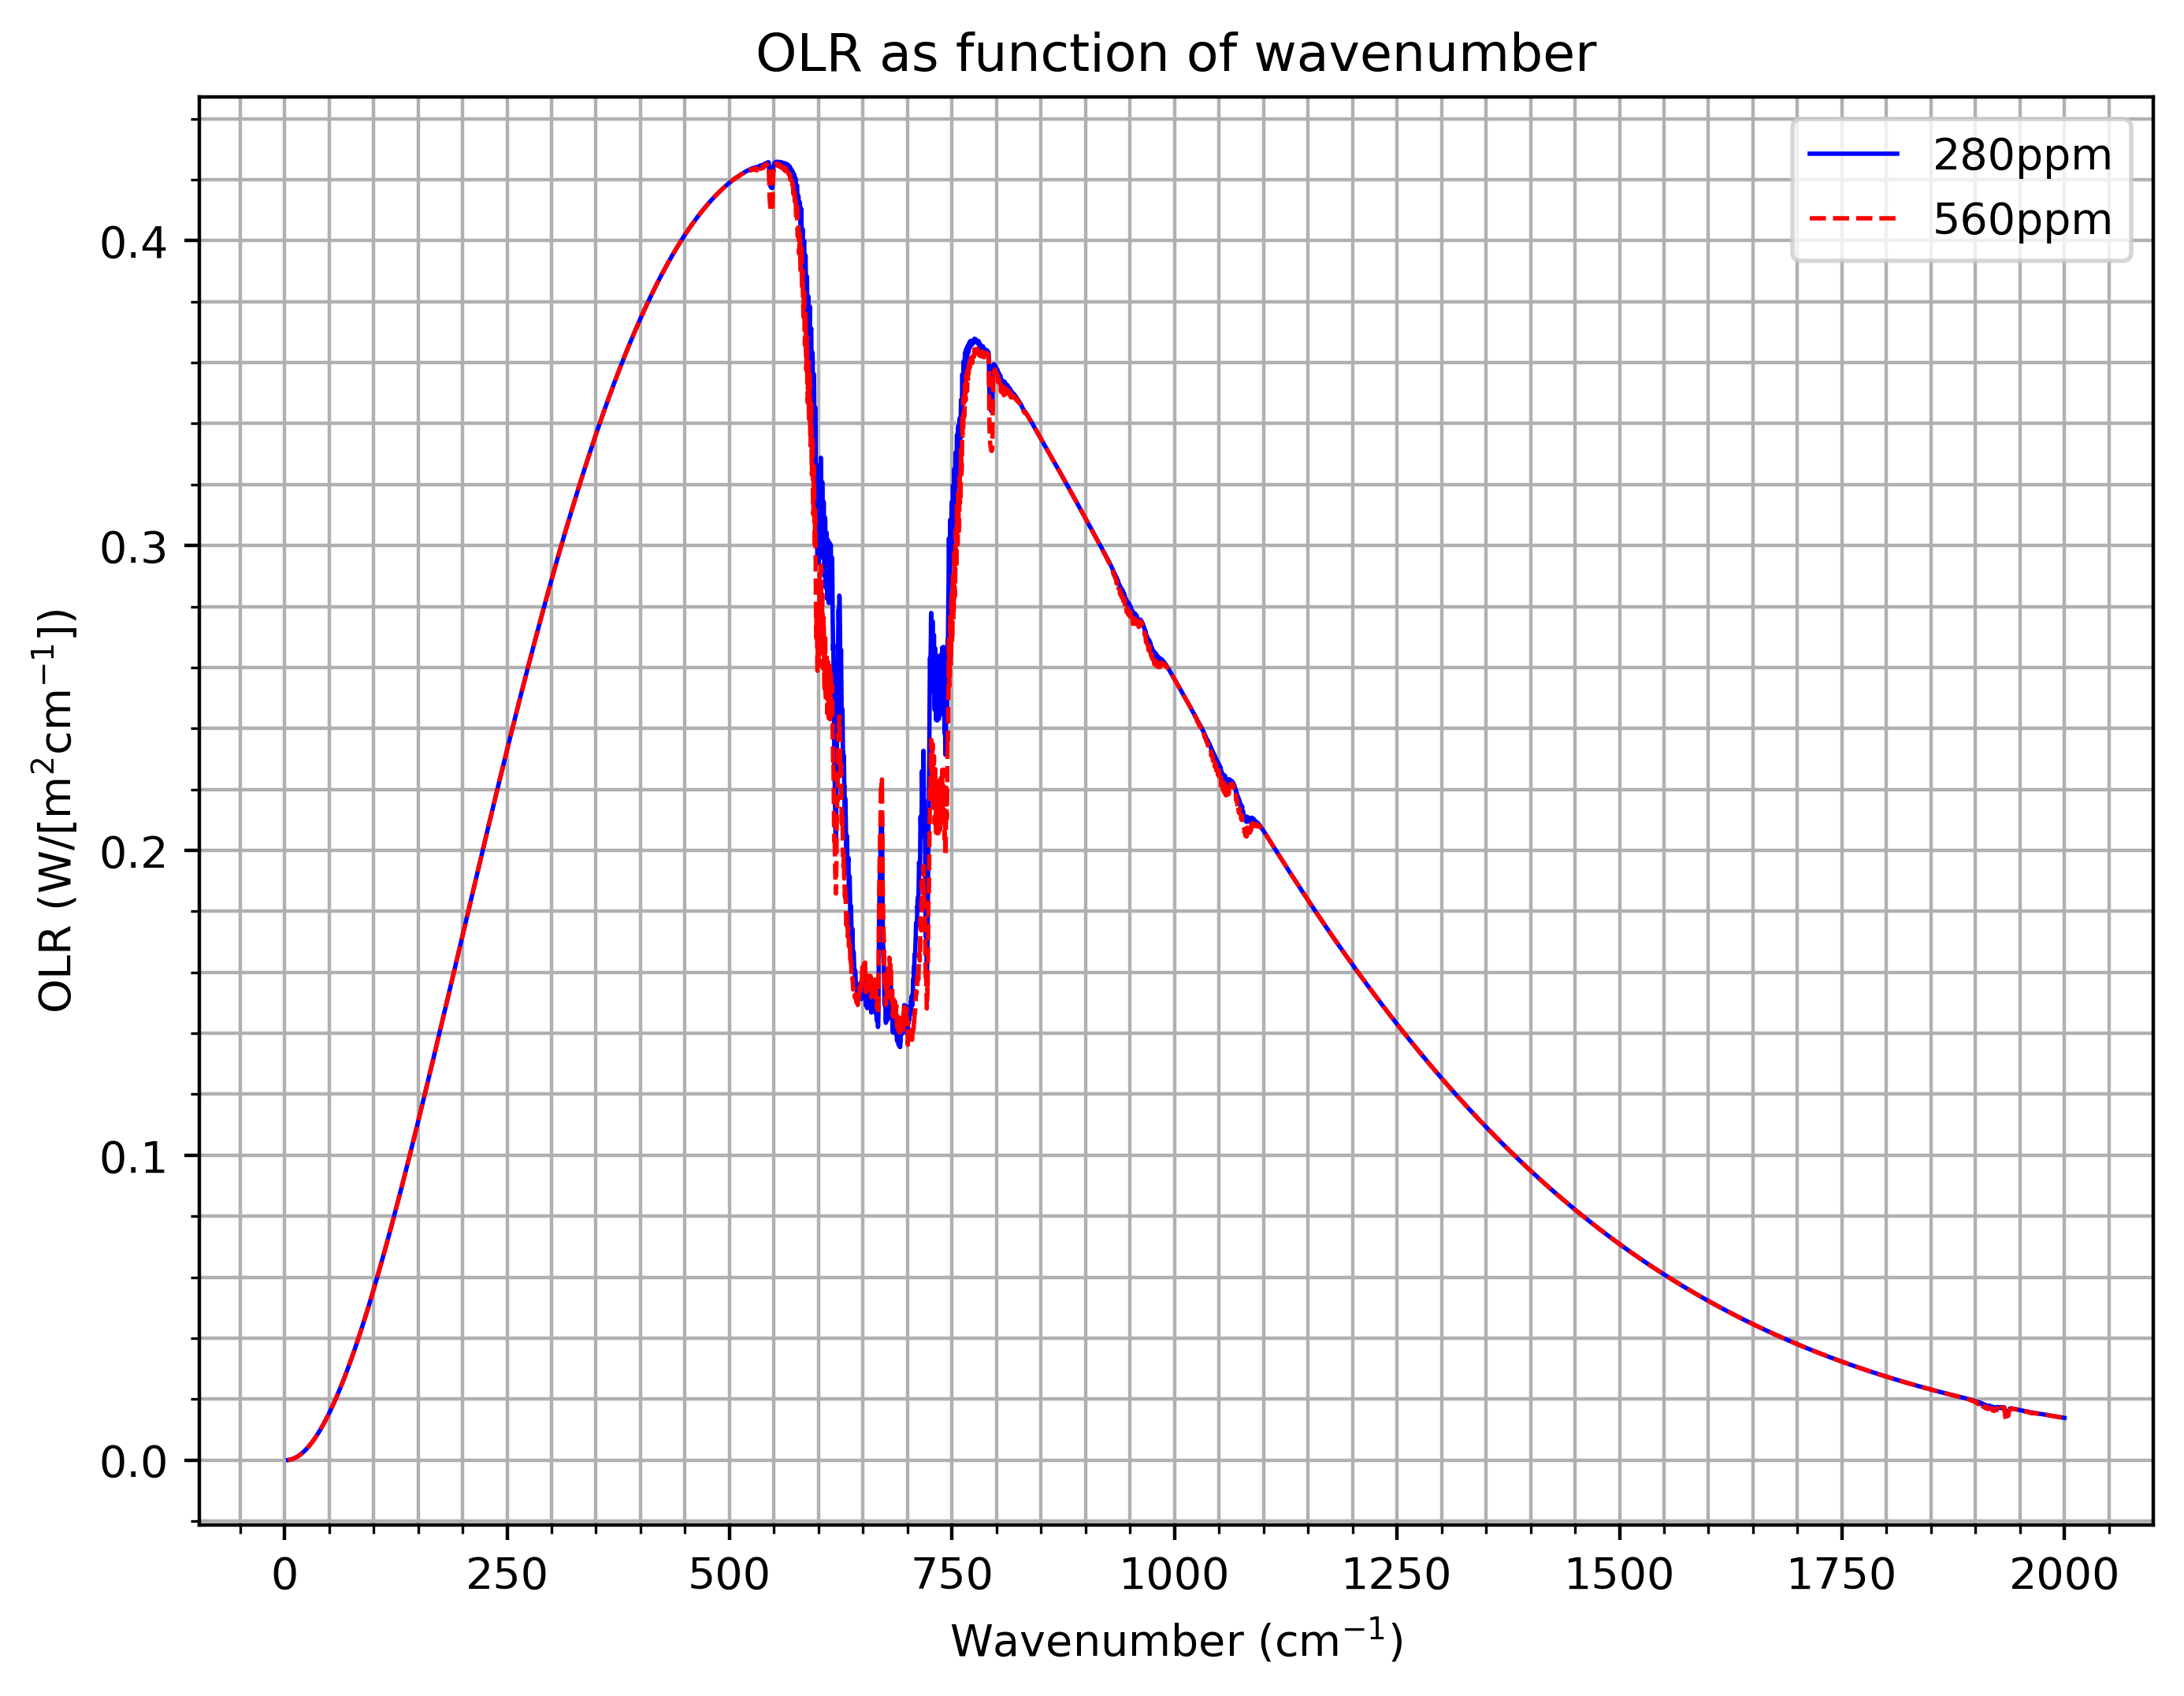

In [8]:
# Read in pickle data of the two OLR curves and plot
fig = plt.figure(figsize=(8,6),dpi=400)
ax = plt.gca()
plt.plot(wavenumbers,OLR_280ppm_CO2_only,lw=1,color="blue",label="280ppm")
plt.plot(wavenumbers,OLR_560ppm_CO2_only,lw=1,color="red",ls='--',label="560ppm")
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('OLR (W/[m$^2$cm$^{-1}$])')

# plot tickmarks and grid
ax.xaxis.set_minor_locator(MultipleLocator(50))
ax.yaxis.set_minor_locator(MultipleLocator(.02))
plt.grid(which='both')

# title and legend:
plt.title("OLR as function of wavenumber")
plt.legend();
plt.show();

c) We choose the top of the trapezoid as 0.42. This gives a total height of the trapezoid as 0.20 W/m$^2$. The bottom width is about 250 cm$^{-1}$ and the top width is about 75 cm$^{-1}$. Thus using the formula for a trapezoid, $A = H * (Base1 + Base2)/2$ we get a radiative forcing of 32.5 W/m$^2$.

d) The integral over the OLR curve tells you the total outgoing longwave radiation. The difference between the total OLR with 280ppm and 560ppm gives you the radiative forcing of doubling CO2.

In [9]:
# approximate the integral by a sum:
Delta_wavenumber = wavenumbers[1] - wavenumbers[0]
RF = Delta_wavenumber*np.sum(OLR_280ppm_CO2_only-OLR_560ppm_CO2_only)
print("Radiative Forcing: "+str(round(RF,3))+' W/m^2')

Radiative Forcing: 3.883 W/m^2


## 4) Logarithmic dependence

In [18]:
# if the warming for CO2 doubling is 3 degree, we can write the warming as
CO2=560
DeltaT=(3/np.log(2))*np.log(2)
print("CO2=",CO2,", DeltaT=",DeltaT)
CO2=400
DeltaT=(3/np.log(2))*np.log(1.43)
print("CO2=",CO2,", DeltaT=",DeltaT)

print("Warming so far is about 1 degree most likely due to the fact that it takes time for the CO2 to distribute across the atmosphere. Further, it can take time for the entire Earth to heat evenly as a result of the greenhouse effect.")

CO2= 560 , DeltaT= 3.0
CO2= 400 , DeltaT= 1.5480454410109943
Warming so far is about 1 degree most likely due to the fact that it takes time for the CO2 to distribute across the atmosphere. Further, it can take time for the entire Earth to heat evenly as a result of the greenhouse effect.


## 5) GWP

reformulate the GWP equation to solve for $a_x/a_r$. 

$\frac{a_x}{a_r} = GWP(x)*\frac{\int_{0}^{TH}[r(t)]dt}{\int_{0}^{TH}[x(t)]dt}$

$\frac{a_x}{a_r} = 34*\frac{\int_{0}^{100}e^{\frac{-t}{200}}dt}{\int_{0}^{100}e^{\frac{-t}{12.4}}dt}$

$\frac{a_x}{a_r} \approx 215.841$

Therefore, we can conclude that methane molecules absorbs more than 215.841 times more strongly than CO$_2$.

$GWP(x) = 215.841*\frac{\int_{0}^{500}e^{\frac{-t}{12.4}}dt}{\int_{0}^{500}e^{\frac{-t}{200}}dt}$

$GWP(x) = 215.841*0.06754$

$GWP(x) = 14.5788$

The absorption efficiency of a molecule measures the rate in which it absorbs specific energy photons, and finding where the "cross-section" of wavelengths in which these absorption rates peak. The GWP measures the forcing effect of a molecule relative to CO$_2$, taking into account its strength as an absorber and also its lifetime.